### **Access to Drive**

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!ls

gdrive	sample_data


# **CREATE MODELS**

In [3]:
import numpy as np

In [4]:
x_train = np.load('gdrive/MyDrive/global_ai_project/data/x_train.npy')
y_train = np.load('gdrive/MyDrive/global_ai_project/data/y_train.npy')
x_valid = np.load('gdrive/MyDrive/global_ai_project/data/x_valid.npy')
y_valid = np.load('gdrive/MyDrive/global_ai_project/data/y_valid.npy')
x_test = np.load('gdrive/MyDrive/global_ai_project/data/x_test.npy')
y_test = np.load('gdrive/MyDrive/global_ai_project/data/y_test.npy')

### **Library**

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

### **Architecture of the Network - 1**

In [28]:
input_shape = (x_train.shape[1], x_train.shape[2], 1)
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [30]:
history = model.fit(
      x_train,y_train,  
      epochs=25,
      batch_size=32,
      verbose=2,
      validation_data = (x_valid,y_valid),
      )

Epoch 1/25
219/219 - 4s - loss: 2.1065 - accuracy: 0.1711 - val_loss: 1.9537 - val_accuracy: 0.2360 - 4s/epoch - 18ms/step
Epoch 2/25
219/219 - 3s - loss: 1.6519 - accuracy: 0.3702 - val_loss: 1.4759 - val_accuracy: 0.4525 - 3s/epoch - 15ms/step
Epoch 3/25
219/219 - 3s - loss: 1.2897 - accuracy: 0.5377 - val_loss: 1.2060 - val_accuracy: 0.5922 - 3s/epoch - 15ms/step
Epoch 4/25
219/219 - 3s - loss: 1.0733 - accuracy: 0.6261 - val_loss: 1.1010 - val_accuracy: 0.6506 - 3s/epoch - 15ms/step
Epoch 5/25
219/219 - 3s - loss: 0.9053 - accuracy: 0.6962 - val_loss: 0.8815 - val_accuracy: 0.7102 - 3s/epoch - 15ms/step
Epoch 6/25
219/219 - 3s - loss: 0.7862 - accuracy: 0.7324 - val_loss: 0.7945 - val_accuracy: 0.7457 - 3s/epoch - 15ms/step
Epoch 7/25
219/219 - 3s - loss: 0.6983 - accuracy: 0.7618 - val_loss: 0.7317 - val_accuracy: 0.7652 - 3s/epoch - 15ms/step
Epoch 8/25
219/219 - 3s - loss: 0.6189 - accuracy: 0.7917 - val_loss: 0.7041 - val_accuracy: 0.7789 - 3s/epoch - 15ms/step
Epoch 9/25
219/2

In [ ]:
model.save("/content/gdrive/My Drive/global_ai_hub/proje/first_urban8k_model.h5")

In [9]:
model.evaluate(x_train,y_train)

219/219 [==============================] - 2s 8ms/step - loss: 0.3377 - accuracy: 0.8817


[0.33766070008277893, 0.8817465901374817]

In [10]:
import matplotlib.pyplot as plt

In [ ]:
fig,axis = plt.subplots(figsize=(8,6))

plt.plot(history.history["accuracy"],label="train accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

plt.show()

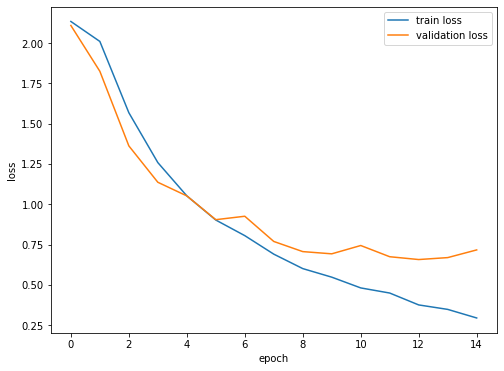

In [12]:
fig,axis = plt.subplots(figsize=(8,6))

plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

In [13]:
input_shape = (x_train.shape[1], x_train.shape[2], 1)
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


history = model.fit(
      x_train,y_train,  
      epochs=15,
      batch_size=32,
      verbose=2,
      validation_data = (x_valid,y_valid),
      )

print("TEST RESULTS")
model.evaluate(x_train,y_train)

Epoch 1/15
219/219 - 5s - loss: 2.6062 - accuracy: 0.2603 - val_loss: 1.5728 - val_accuracy: 0.4273 - 5s/epoch - 22ms/step
Epoch 2/15
219/219 - 4s - loss: 1.3587 - accuracy: 0.5084 - val_loss: 1.2718 - val_accuracy: 0.5475 - 4s/epoch - 18ms/step
Epoch 3/15
219/219 - 4s - loss: 1.1245 - accuracy: 0.6125 - val_loss: 1.1069 - val_accuracy: 0.6117 - 4s/epoch - 20ms/step
Epoch 4/15
219/219 - 4s - loss: 0.9227 - accuracy: 0.6912 - val_loss: 0.9559 - val_accuracy: 0.6999 - 4s/epoch - 20ms/step
Epoch 5/15
219/219 - 4s - loss: 0.7379 - accuracy: 0.7552 - val_loss: 0.7987 - val_accuracy: 0.7468 - 4s/epoch - 18ms/step
Epoch 6/15
219/219 - 4s - loss: 0.6113 - accuracy: 0.7941 - val_loss: 0.7591 - val_accuracy: 0.7503 - 4s/epoch - 18ms/step
Epoch 7/15
219/219 - 4s - loss: 0.4958 - accuracy: 0.8314 - val_loss: 0.7417 - val_accuracy: 0.7606 - 4s/epoch - 18ms/step
Epoch 8/15
219/219 - 4s - loss: 0.3837 - accuracy: 0.8757 - val_loss: 0.7154 - val_accuracy: 0.7709 - 4s/epoch - 18ms/step
Epoch 9/15
219/2

[0.042424675077199936, 0.9904080033302307]

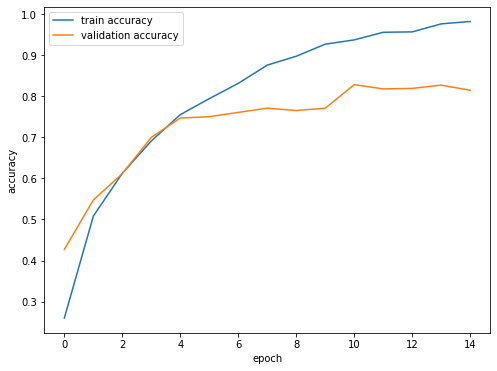

In [14]:
fig,axis = plt.subplots(figsize=(8,6))

plt.plot(history.history["accuracy"],label="train accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

plt.show()

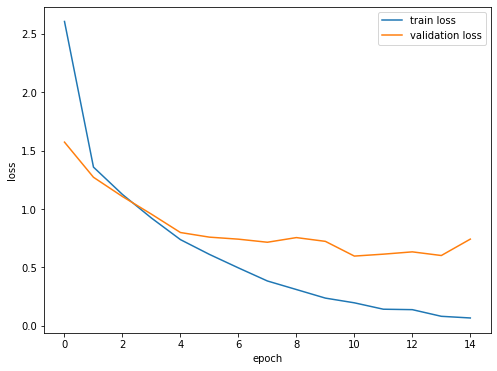

In [15]:
fig,axis = plt.subplots(figsize=(8,6))

plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

### **Architecture of the Network - 2**

In [16]:
input_shape = (x_train.shape[1], x_train.shape[2], 1)
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


history = model.fit(
      x_train,y_train,  
      epochs=15,
      batch_size=32,
      verbose=2,
      validation_data = (x_valid,y_valid),
      )

print("TEST RESULTS")
model.evaluate(x_train,y_train)

Epoch 1/15
219/219 - 4s - loss: 2.7274 - accuracy: 0.2162 - val_loss: 1.7925 - val_accuracy: 0.3998 - 4s/epoch - 20ms/step
Epoch 2/15
219/219 - 4s - loss: 1.5255 - accuracy: 0.4394 - val_loss: 1.3907 - val_accuracy: 0.5074 - 4s/epoch - 18ms/step
Epoch 3/15
219/219 - 4s - loss: 1.3059 - accuracy: 0.5284 - val_loss: 1.2427 - val_accuracy: 0.5888 - 4s/epoch - 19ms/step
Epoch 4/15
219/219 - 4s - loss: 1.1432 - accuracy: 0.6003 - val_loss: 1.2610 - val_accuracy: 0.5819 - 4s/epoch - 18ms/step
Epoch 5/15
219/219 - 4s - loss: 0.9265 - accuracy: 0.6863 - val_loss: 0.9009 - val_accuracy: 0.7056 - 4s/epoch - 18ms/step
Epoch 6/15
219/219 - 4s - loss: 0.7742 - accuracy: 0.7406 - val_loss: 0.7764 - val_accuracy: 0.7560 - 4s/epoch - 18ms/step
Epoch 7/15
219/219 - 4s - loss: 0.6368 - accuracy: 0.7894 - val_loss: 0.7249 - val_accuracy: 0.7560 - 4s/epoch - 18ms/step
Epoch 8/15
219/219 - 4s - loss: 0.5343 - accuracy: 0.8159 - val_loss: 0.7658 - val_accuracy: 0.7503 - 4s/epoch - 18ms/step
Epoch 9/15
219/2

[0.07342642545700073, 0.9836792945861816]

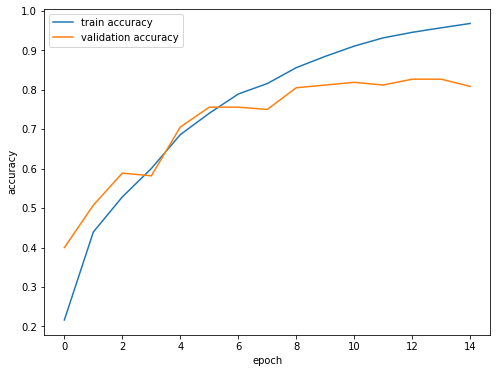

In [19]:
fig,axis = plt.subplots(figsize=(8,6))

plt.plot(history.history["accuracy"],label="train accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

plt.show()

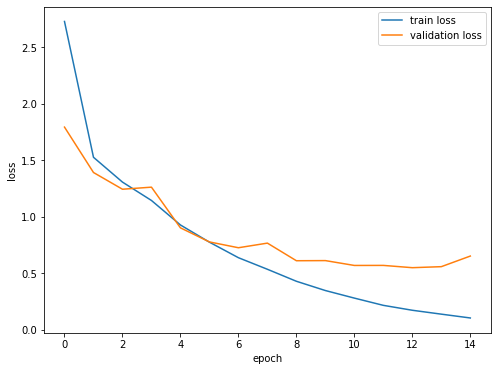

In [20]:
fig,axis = plt.subplots(figsize=(8,6))

plt.plot(history.history["loss"],label="train loss")
plt.plot(history.history["val_loss"],label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.show()

### **Architecture of the Network - 3**

In [21]:
def create_model(dropout_rate):

  input_shape = (x_train.shape[1], x_train.shape[2], 1)
  model = tf.keras.models.Sequential([
  # This is the first convolution
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(dropout_rate),
  # The second convolution
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(dropout_rate),

  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  # 64 neuron hidden layer
  tf.keras.layers.Dense(64, activation='relu'),
  # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
  tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])
  return model

In [24]:
model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [25]:
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train[0:100], y_train[0:100])

Epoch 1/15
10/10 - 1s - loss: 2.3520 - accuracy: 0.1000 - 535ms/epoch - 53ms/step
Epoch 2/15
10/10 - 0s - loss: 2.2051 - accuracy: 0.2400 - 55ms/epoch - 5ms/step
Epoch 3/15
10/10 - 0s - loss: 2.0112 - accuracy: 0.3100 - 48ms/epoch - 5ms/step
Epoch 4/15
10/10 - 0s - loss: 1.6817 - accuracy: 0.4400 - 49ms/epoch - 5ms/step
Epoch 5/15
10/10 - 0s - loss: 1.2854 - accuracy: 0.6200 - 48ms/epoch - 5ms/step
Epoch 6/15
10/10 - 0s - loss: 1.0809 - accuracy: 0.6200 - 50ms/epoch - 5ms/step
Epoch 7/15
10/10 - 0s - loss: 0.7548 - accuracy: 0.8100 - 47ms/epoch - 5ms/step
Epoch 8/15
10/10 - 0s - loss: 0.6100 - accuracy: 0.8800 - 46ms/epoch - 5ms/step
Epoch 9/15
10/10 - 0s - loss: 0.4288 - accuracy: 0.9300 - 46ms/epoch - 5ms/step
Epoch 10/15
10/10 - 0s - loss: 0.2950 - accuracy: 0.9800 - 46ms/epoch - 5ms/step
Epoch 11/15
10/10 - 0s - loss: 0.2363 - accuracy: 0.9500 - 46ms/epoch - 5ms/step
Epoch 12/15
10/10 - 0s - loss: 0.1939 - accuracy: 0.9600 - 48ms/epoch - 5ms/step
Epoch 13/15
10/10 - 0s - loss: 0.16

In [26]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.370172 using {'dropout_rate': 0.0}
0.370172 (0.017364) with: {'dropout_rate': 0.0}
0.229947 (0.012936) with: {'dropout_rate': 0.1}
0.230838 (0.094969) with: {'dropout_rate': 0.2}
0.280452 (0.103993) with: {'dropout_rate': 0.3}
0.269162 (0.104922) with: {'dropout_rate': 0.4}
0.130422 (0.057780) with: {'dropout_rate': 0.5}
0.260250 (0.052537) with: {'dropout_rate': 0.6}
0.130422 (0.038756) with: {'dropout_rate': 0.7}
0.140523 (0.052387) with: {'dropout_rate': 0.8}
0.120321 (0.043499) with: {'dropout_rate': 0.9}


### **Conclusion**

We think that the best model is the first model since it reaches the most optimal result.